In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import netCDF4
import typhon as ty

import konrad


ty.plots.styles.use()

# Run simple RCE simulation

In [3]:
phlev = konrad.utils.get_quadratic_pgrid(1000e2, 10, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    timestep='24h',  # Set timestep in model time.
    max_duration='500d',  # Set runtime.
    outfile='rce.nc',  # Specify output filename.
)
rce.run()  # Start the simulation.

# Read data from netCDF file and plot it

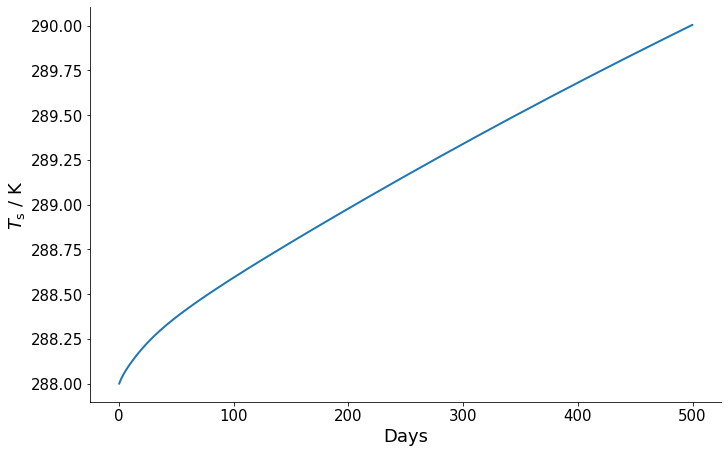

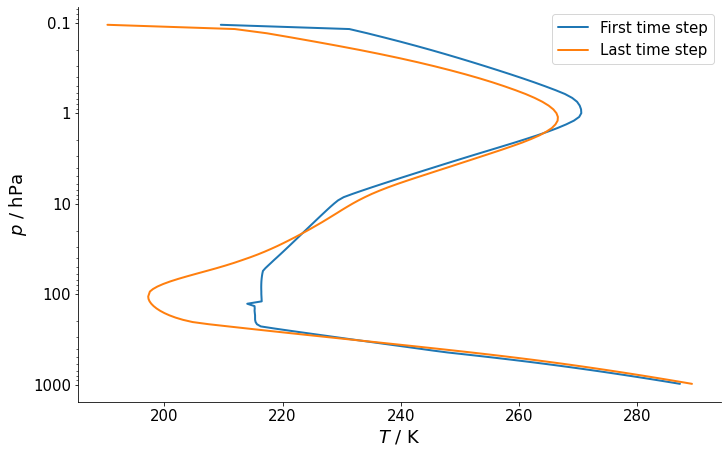

In [4]:
with netCDF4.Dataset("rce.nc", "r") as root:
    hours = root["time"][:]
    surface_temperature = root["surface/temperature"][:]
    
    plev = root["plev"][:]
    T = root["atmosphere/T"][:]
    
# Time series
fig, ax = plt.subplots()
ax.plot(hours / 24, surface_temperature)
ax.set_xlabel("Days")
ax.set_ylabel("$T_\mathrm{s}$ / K")

# Plot different states during model run
fig, ax = plt.subplots()
ty.plots.profile_p_log(plev, T[0], label="First time step")
ty.plots.profile_p_log(plev, T[-1], label="Last time step")
ax.set_xlabel("$T$ / K")
ax.set_ylabel("$p$ / hPa")
ax.legend()